In [27]:
*=====================================================================

// PROYECTO: Séptima sesión introductoria a STATA
// PROGRAMA: sesion_7.do
// TAREA: Reshape complejos y su uso en gráficas
// CREADO POR: Manuel Toral
// FECHA DE CREACIÓN: 2022-08-03
// FECHA DE ACTUALIZACIÓN: 2022-08-03

*========================================================================
cd "C:\Users\User\Documents\MUCD_stata_intro\Sesion_7"
ssc install blindschemes


C:\Users\User\Documents\MUCD_stata_intro\Sesion_7

checking blindschemes consistency and verifying not already installed...
installing into C:\Users\User\ado\plus\...
installation complete.


In [ ]:
log using "logs_notebooks\log_sesion7.smcl", text replace name(sesion7)

In [11]:
// 1. Datos
import delimited "data\IDEFC_NM_jun22.csv", clear

tab modalidad if subtipodedelito == "Robo a casa habitación"

keep if subtipodedelito == "Robo a casa habitación"

collapse (sum) enero-diciembre, by(año modalidad)


(19 vars, 25,088 obs)


                              Modalidad |      Freq.     Percent        Cum.
----------------------------------------+-----------------------------------
                          Con violencia |        256       50.00       50.00
                          Sin violencia |        256       50.00      100.00
----------------------------------------+-----------------------------------
                                  Total |        512      100.00

(24,576 observations deleted)



In [14]:
// 3. Convertir de wide a long

rename (enero-diciembre) (robocasahab(#)) ,addnumber

In [16]:
gen id = _n

reshape long robocasahab, i(id) j(mes)



(note: j = 1 2 3 4 5 6 7 8 9 10 11 12)

Data                               wide   ->   long
-----------------------------------------------------------------------------
Number of obs.                       16   ->     192
Number of variables                  15   ->       5
j variable (12 values)                    ->   mes
xij variables:
robocasahab1 robocasahab2 ... robocasahab12->  robocasahab
-----------------------------------------------------------------------------


In [18]:
gen dia = 1

gen edate = mdy(mes, dia, año)

format edate %dm-y // Mejor formato

In [20]:
drop if robocasahab == 0

(12 observations deleted)


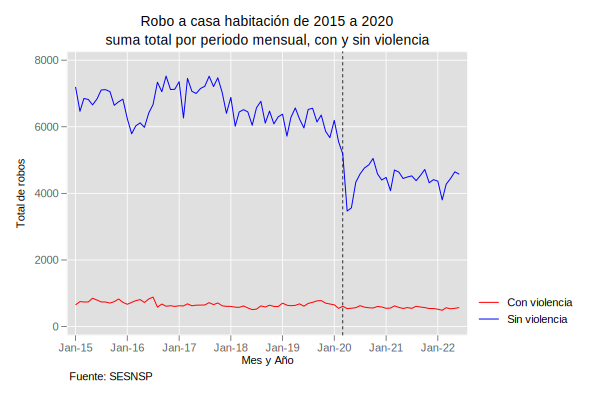

In [37]:
//di td(23mar2020)

set scheme plottig

twoway (line robocasahab edate if modalidad=="Con violencia", lcolor(red)) ///
(line robocasahab edate if modalidad=="Sin violencia", lcolor(blue)), xline(21975) title(Robo a casa habitación de 2015 a 2020) ///
subtitle("suma total por periodo mensual, con y sin violencia") ytitle(Total de robos) ///
xtitle(Mes y Año) note(Fuente: SESNSP) legend(label(1 "Con violencia") label(2 "Sin violencia")) 


In [21]:
%browse

,id,mes,año,modalidad,robocasahab,dia,edate
1,1,1,2015,Con violencia,653,1,Jan-15
2,1,2,2015,Con violencia,750,1,Feb-15
3,1,3,2015,Con violencia,739,1,Mar-15
4,1,4,2015,Con violencia,740,1,Apr-15
5,1,5,2015,Con violencia,851,1,May-15
6,1,6,2015,Con violencia,797,1,Jun-15
7,1,7,2015,Con violencia,740,1,Jul-15
8,1,8,2015,Con violencia,738,1,Aug-15
9,1,9,2015,Con violencia,706,1,Sep-15
10,1,10,2015,Con violencia,749,1,Oct-15


In [ ]:
log close sesion7